# File Mount

In [1]:
# connect to your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# change current path to a certain path(folder) in your drive.
# this folder may contain a image to be use in your homework.
# import os
# os.chdir('/content/drive/MyDrive/AI_DIG')
%cd /content/drive/MyDrive/AI_DIG/HW1

/content/drive/MyDrive/AI_DIG/HW1


# Digital image

### Color Image

Color | RGB value   |
-------|:------------------|
Red  | 255, 0, 0   |
Orange | 255, 128, 0  |
Pink  | 255, 153, 255 |


### OpenCV imread
retval	=	cv.imread(	filename[, flags]	)

* In the case of color images, the decoded images will $\color{red}{have\;the\; channels\;stored\;in\;B\;G\;R\;order.}$

* To learn more about [cv.imread()](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html)


### matplotlib.pyplot.imshow
matplotlib.pyplot.imshow(X, **cmap**=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)

* (M, N, 3): an image with RGB values ($\color{blue}{0～1\;float}$ or $\color{red}{0～255\;int}$).

* (M, N, 4): an image with RGBA values ($\color{blue}{0～1\;float}$ or $\color{red}{0～255\;int}$),  i.e. including transparency

* To learn more about [matplotlib.pyplot.imshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

![image.png](https://i.imgur.com/Sl4fkuJ.png)



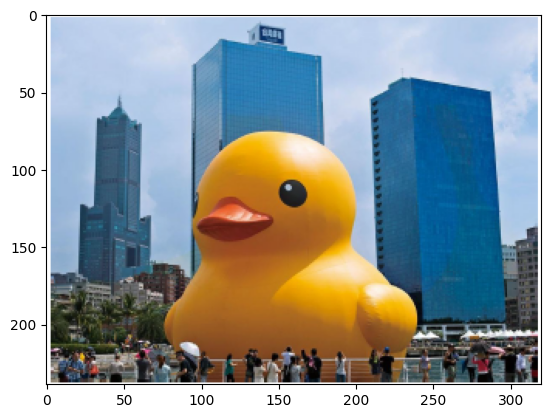

In [3]:
from  matplotlib import pyplot as plt
import cv2
import numpy as np

image_bgr = cv2.imread("./duck.jpg") # the decoded images will have the channels stored in B G R order.


# change the image matrix into R G B order.
# method 1
# b,g,r = cv2.split(image_bgr)
# image = cv2.merge([r,g,b])

# method 2
image = image_bgr[:,:,::-1]

# method 2
# image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# show the image
plt.imshow(image)
plt.show()

In [4]:
print('image shape: ', image.shape) # show the image's shape(dimention).
print('pixel space in position (100, 150): ', image[100,150]) # one pixel color space.

image shape:  (239, 320, 3)
pixel space in position (100, 150):  [230 159   1]


In [5]:
print('image type: ', image.dtype) # show the format in which the image is stored.

image type:  uint8


# 7 image point processing

At 2. introduction to Computer Vision (p.7) <br>
In this section, use the RGB image matrix you create above to finish the jobs.

![image.png](https://i.imgur.com/D2amXGP.jpg)

### 1. Invert

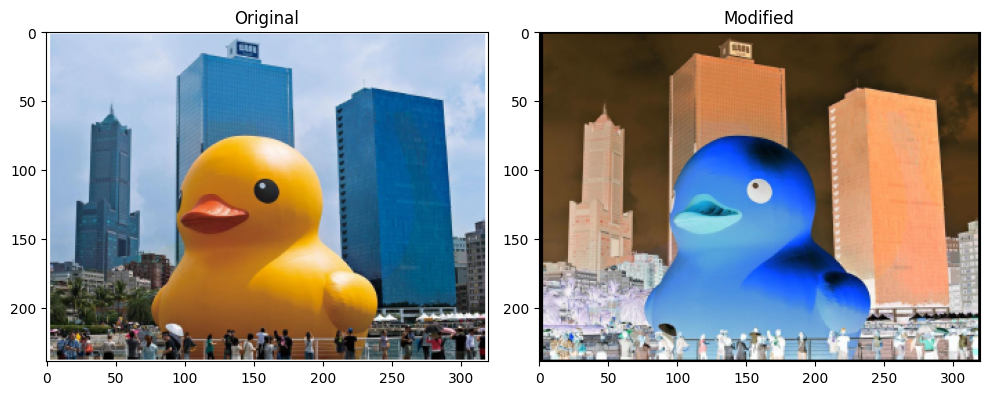

In [6]:
# image invert #
# you must plot both the original image and the modefied image as the result.
# -------- To do ------------- #
img_int = image.astype('int32')
img = np.clip(255,255,255 - img_int )

# Create a Matplotlib figure with two subplots
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title('Modified')
plt.imshow(img)

plt.tight_layout()
plt.show()

### 2. Darken

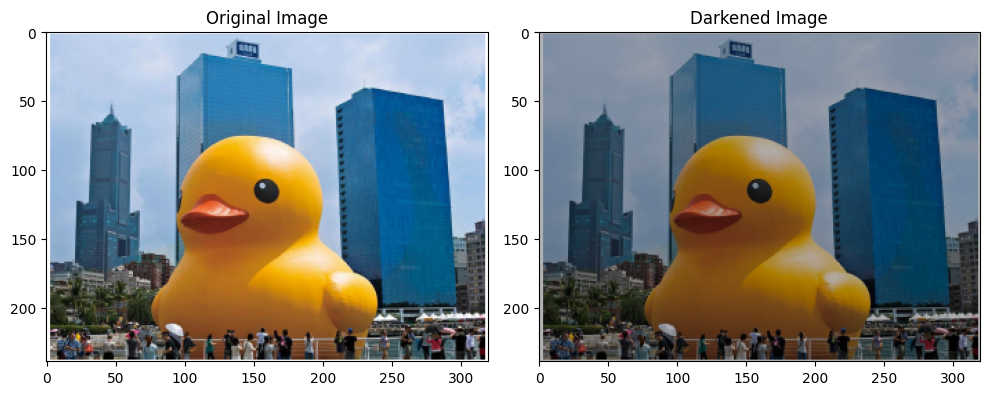

In [7]:
# image datken #
# you must plot both the original image and the modefied image as the result.
# -------- To do ------------- #
# image = image.copy()

dark_factor = 0.7
darkened_image = np.clip(image * dark_factor, 0, 255).astype(np.uint8)

# Display the original and darkened images using Matplotlib
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title('Darkened Image')
plt.imshow(darkened_image)

plt.tight_layout()
plt.show()

### 3. Raise Lighten

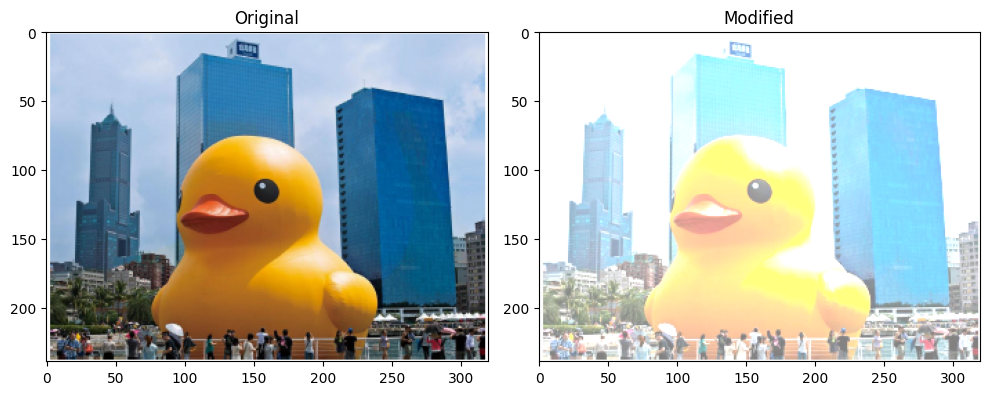

In [8]:
# image lighten #
# you must plot both the original image and the modefied image as the result.
# -------- To do ------------- #
img_int = image.astype('int32')
img = np.clip(img_int + 128,0,255)

# Create a Matplotlib figure with two subplots
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title('Modified')
plt.imshow(img)

plt.tight_layout()
plt.show()

### 6. Non-linear Lower Contrast

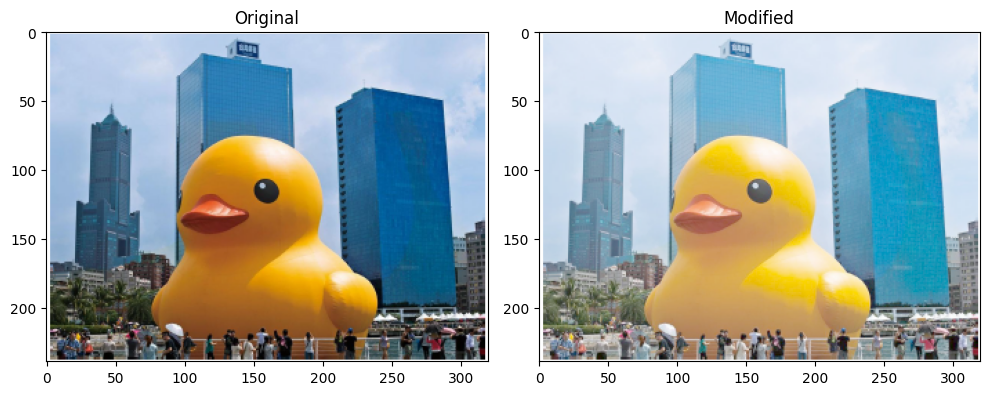

In [11]:
# Non-linear lower contrast #
# you must plot both the original image and the modefied image as the result.
# -------- To do ------------- #
gamma = 0.5

adjusted_image = np.power(image / 255.0, gamma) * 255.0
adjusted_image = adjusted_image.astype(np.uint8)


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title('Modified')
plt.imshow(adjusted_image)

plt.tight_layout()
plt.show()

# Filtering an Image
### Opencv Library
First, we use a package to show how gaussian filters change your original image.

filter with original, image shape: (182, 276, 3)
filter with 3*3 kernel, image shape: (182, 276, 3)
filter with 5*5 kernel, image shape: (182, 276, 3)
filter with 7*7 kernel, image shape: (182, 276, 3)


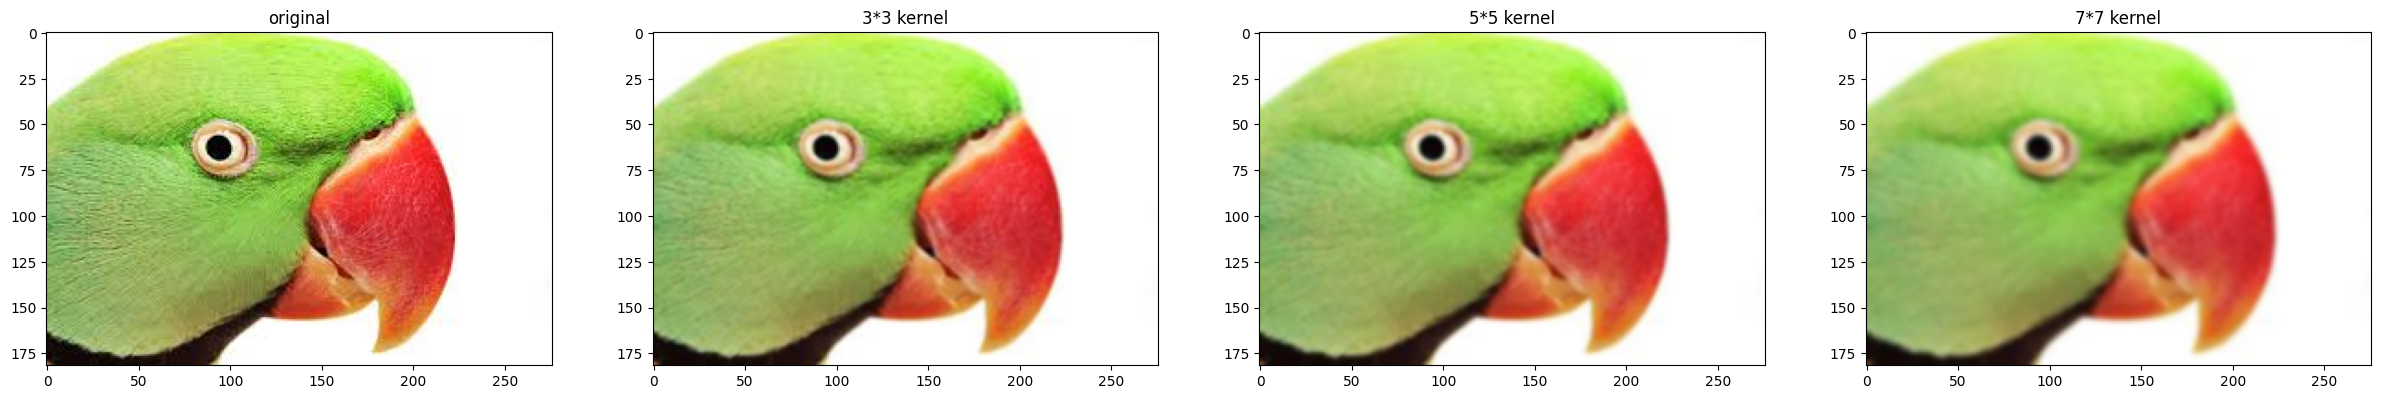

In [14]:
image = cv2.imread("bird.jpg")
image = image[:,:,::-1]

image_list = []
image_list.append(image)
image_list.append(cv2.GaussianBlur(image,(3,3),0))
image_list.append(cv2.GaussianBlur(image,(5,5),0))
image_list.append(cv2.GaussianBlur(image,(7,7),0))
title_list = []
title_list.append('original')
title_list.append('3*3 kernel')
title_list.append('5*5 kernel')
title_list.append('7*7 kernel')

fig = plt.figure(figsize=(30,60))
for im,ss,i in zip(image_list,title_list,range(0, 4)):
  plt.subplot(1,4,i+1)
  plt.imshow(im)
  plt.title(ss)
  print('filter with {}, image shape: {}'.format(ss, im.shape))
plt.show()


## Step 1 : Get gaussian filter kernel

![image.png](https://i.imgur.com/oh9HkZA.png)

[OpenCV getGaussianKernel](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=gaussianblur#Mat%20getGaussianKernel(int%20ksize,%20double%20sigma,%20int%20ktype))

### getGaussianKernel(int ksize, double sigma, int ktype=CV_64F )

### Parameters:
**ksize** – Aperture size. It should be odd ( $ksize\ mod\ 2 = 1$) and positive.

**sigma** – Gaussian standard deviation. If it is non-positive, it is computed from ksize as $\ \ sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8$

**ktype** – Type of filter coefficients. It can be CV_32f or CV_64F .

$G_i = \alpha * e^{(-i-(ksize-1)/2)^2/(2*sigma^2)},$

$where\ i = 0 \sim ksize-1,\ and\ \alpha\ is\ the\ scale\ factor\ chosen\ so\ that \sum_iG_i=1$

In [15]:
# define a function that could return a gaussian kernel based on "KernelSize" variable input.

import math

def GaussianKernel(KernelSize):
  sigma = 0.3*((KernelSize-1)*0.5 - 1) + 0.8
  Gaussian=[]
  #各係數相加後總值
  total=0
  for i in range(0,KernelSize):
      Filter_list = []
      for j in range(0,KernelSize):
        #高斯函數公式
        # -------------- To do ----------------- #
        x, y = i - (KernelSize - 1) / 2, j - (KernelSize - 1) / 2
        exponent = -(x**2 + y**2) / (2 * sigma**2)
        value = math.exp(exponent) / (2 * math.pi * sigma**2)
        Filter_list.append(value)
        total += value
      Gaussian+= [Filter_list]
  #print(Gaussia)
  return np.array(Gaussian)/total

KernelSize = 7 # use kernel size 7 in this section
Gaussian_Kernel = GaussianKernel(KernelSize)

# you should print the sum of the filter and the kernel itself as the result of this cell
print('Sum of the filter: ',np.sum(Gaussian_Kernel))
print('filter: \n', Gaussian_Kernel)

Sum of the filter:  0.9999999999999998
filter: 
 [[0.00084073 0.00301024 0.00647097 0.00835139 0.00647097 0.00301024
  0.00084073]
 [0.00301024 0.01077825 0.02316949 0.02990239 0.02316949 0.01077825
  0.00301024]
 [0.00647097 0.02316949 0.04980635 0.06427974 0.04980635 0.02316949
  0.00647097]
 [0.00835139 0.02990239 0.06427974 0.082959   0.06427974 0.02990239
  0.00835139]
 [0.00647097 0.02316949 0.04980635 0.06427974 0.04980635 0.02316949
  0.00647097]
 [0.00301024 0.01077825 0.02316949 0.02990239 0.02316949 0.01077825
  0.00301024]
 [0.00084073 0.00301024 0.00647097 0.00835139 0.00647097 0.00301024
  0.00084073]]


## Step 2 : Padding

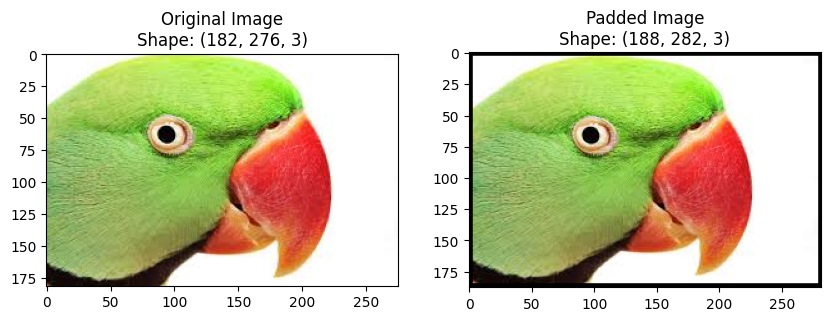

In [16]:
# define a function that could return a image matrix with zero-padding based on the input "img" and "p_size".

def padding_img(img,p_size,style='constant'):
  # -------------- To do ----------------- #
  if style=='constant':
    padded_img = np.pad(img, ((p_size, p_size), (p_size, p_size), (0,0)), mode=style, constant_values=0)
  else:
    padded_img = np.pad(img, ((p_size, p_size), (p_size, p_size), (0,0)), mode=style)
  return padded_img

# you should plot the original image, the padding image and their shape.
# -------------- To do ----------------- #
padding_size = 3
padding_style = 'constant'
# Pad the image
padded_image = padding_img(image, padding_size, padding_style)

# Plot the original and padded images along with their shapes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image\nShape: {}".format(image.shape))

plt.subplot(1, 2, 2)
plt.imshow(padded_image)
plt.title("Padded Image\nShape: {}".format(padded_image.shape))

plt.show()

## Step 3 : Convolution


[The difference between convolution and cross-correlation from a signal-analysis point of view](https://dsp.stackexchange.com/questions/27451/the-difference-between-convolution-and-cross-correlation-from-a-signal-analysis)

[Border type](https://docs.opencv.org/master/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5)

![](https://i.imgur.com/qEYv2fV.png)
![](https://i.imgur.com/SGeFKLD.png)

In [17]:
# define a function that does the convlution operation with the input image matrix and input kernel matrix.

def Convolution(image, Kernel):
  row, col, depth = image.shape
  k_row, k_col = Kernel.shape
  resx = np.zeros((row, col, depth))  # Initialize a result image
  padimg = padding_img(image,(KernelSize-1)//2,style='constant')

  # -------------- To do ----------------- #
  for i in range(row):
    for j in range(col):
      for k in range(depth):
        # Extract the region of interest (ROI) from the padded image
        roi = padimg[i : i+k_row, j : j+k_col, k]
        # Perform element-wise multiplication between the ROI and the kernel
        conv = np.sum(roi * Kernel)
        # if i==1:
        #   print(conv)
        # Store the result in the output image
        resx[i, j, k] = conv
  return resx

resx = Convolution(image, Gaussian_Kernel) # we get a result matrix here.
resx = resx.astype('uint8')
print('Convolution Finished!')

Convolution Finished!


## Step 4 : Result

Original Image Shape: (182, 276, 3)
Resulting Image Shape: (182, 276, 3)


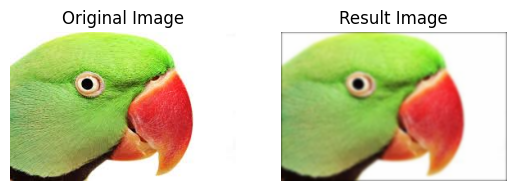

In [18]:
# you should plot both the original image and the image after having convlution with the kernel.
# you should print their shape.
# -------------- To do ----------------- #
print('Original Image Shape:', image.shape)
print('Resulting Image Shape:', resx.shape)

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Plot the result of convolution
plt.subplot(1, 2, 2)
plt.imshow(resx)
plt.title('Result Image')
plt.axis('off')

plt.show()

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'original')

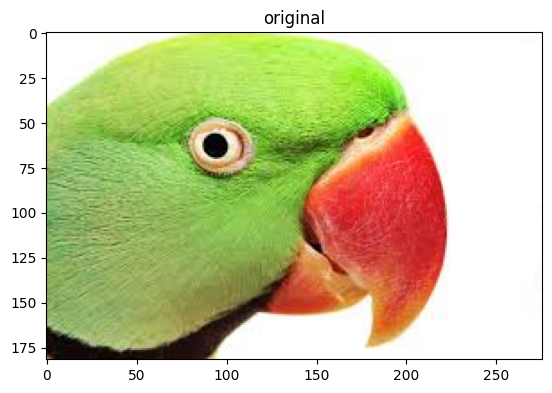

In [20]:
image = cv2.imread("bird.jpg")
image = image[:,:,::-1]

plt.imshow(image)
plt.title('original')

### Sharpening Filter

In [21]:
# you could use the conv function in your previous work.
# use [0 -1 0] to sharp your image
#    [-1 5 -1]
#    [0 -1 0]
def Sharpening(image, Sharpen_Kernel, KernelSize):
  # -------------- To do ----------------- #
  row, col, depth = image.shape
  k_row, k_col = Sharpen_Kernel.shape
  Sharpen_img = np.zeros((row, col, depth))  # Initialize a result image
  padimg = padding_img(image,(KernelSize-1)//2,style='constant')

  # -------------- To do ----------------- #
  for i in range(row):
    for j in range(col):
      for k in range(depth):
        # Extract the region of interest (ROI) from the padded image
        roi = padimg[i : i+k_row, j : j+k_col, k]
        # Perform element-wise multiplication between the ROI and the kernel
        conv = np.sum(roi * Sharpen_Kernel)
        conv = np.clip(conv, 0, 255)
        # Store the result in the output image
        Sharpen_img[i, j, k] = conv
  return Sharpen_img


KernelSize = 3
Sharpen_Kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
Sharpen_image = Sharpening(image, Sharpen_Kernel, KernelSize)
Sharpen_image = Sharpen_image.astype('uint8')


Original Image Shape: (182, 276, 3)
Resulting Image Shape: (182, 276, 3)


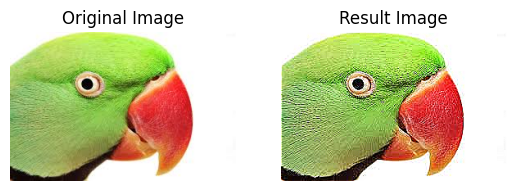

In [22]:
# plot the image and shape
# -------------- To do ----------------- #
print('Original Image Shape:', image.shape)
print('Resulting Image Shape:', Sharpen_image.shape)

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Plot the result of convolution
plt.subplot(1, 2, 2)
plt.imshow(Sharpen_image)
plt.title('Result Image')
plt.axis('off')

plt.show()